In [1]:
print("Ray2")

Ray2


In [2]:
import os
import tarfile
from six.moves import urllib
DOWNLOAD_ROOT = "https://raw.githubusercontent.com/ageron/handson-ml2/master/"
HOUSING_PATH = os.path.join("datasets", "housing")
HOUSING_URL = DOWNLOAD_ROOT + "datasets/housing/housing.tgz"
def fetch_housing_data(housing_url=HOUSING_URL, housing_path=HOUSING_PATH):
 if not os.path.isdir(housing_path):
     os.makedirs(housing_path)
 tgz_path = os.path.join(housing_path, "housing.tgz")
 urllib.request.urlretrieve(housing_url, tgz_path)
 housing_tgz = tarfile.open(tgz_path)
 housing_tgz.extractall(path=housing_path)
 housing_tgz.close()

In [3]:
fetch_housing_data()

In [4]:
path = os.path.join(HOUSING_PATH, "housing.csv")

In [5]:
import pandas as pd

In [6]:
df = pd.read_csv(path)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [8]:
df.head()

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.23     37.88                41.0        880.0           129.0   
1    -122.22     37.86                21.0       7099.0          1106.0   
2    -122.24     37.85                52.0       1467.0           190.0   
3    -122.25     37.85                52.0       1274.0           235.0   
4    -122.25     37.85                52.0       1627.0           280.0   

   population  households  median_income  median_house_value ocean_proximity  
0       322.0       126.0         8.3252            452600.0        NEAR BAY  
1      2401.0      1138.0         8.3014            358500.0        NEAR BAY  
2       496.0       177.0         7.2574            352100.0        NEAR BAY  
3       558.0       219.0         5.6431            341300.0        NEAR BAY  
4       565.0       259.0         3.8462            342200.0        NEAR BAY

In [9]:
df.tail()

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
20635    -121.09     39.48                25.0       1665.0           374.0   
20636    -121.21     39.49                18.0        697.0           150.0   
20637    -121.22     39.43                17.0       2254.0           485.0   
20638    -121.32     39.43                18.0       1860.0           409.0   
20639    -121.24     39.37                16.0       2785.0           616.0   

       population  households  median_income  median_house_value  \
20635       845.0       330.0         1.5603             78100.0   
20636       356.0       114.0         2.5568             77100.0   
20637      1007.0       433.0         1.7000             92300.0   
20638       741.0       349.0         1.8672             84700.0   
20639      1387.0       530.0         2.3886             89400.0   

      ocean_proximity  
20635          INLAND  
20636          INLAND  
20637          INLAND  
20638          INLAND  
20639          INLAND

In [10]:
df["ocean_proximity"].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [11]:
df.describe()

longitude      latitude  housing_median_age   total_rooms  \
count  20640.000000  20640.000000        20640.000000  20640.000000   
mean    -119.569704     35.631861           28.639486   2635.763081   
std        2.003532      2.135952           12.585558   2181.615252   
min     -124.350000     32.540000            1.000000      2.000000   
25%     -121.800000     33.930000           18.000000   1447.750000   
50%     -118.490000     34.260000           29.000000   2127.000000   
75%     -118.010000     37.710000           37.000000   3148.000000   
max     -114.310000     41.950000           52.000000  39320.000000   

       total_bedrooms    population    households  median_income  \
count    20433.000000  20640.000000  20640.000000   20640.000000   
mean       537.870553   1425.476744    499.539680       3.870671   
std        421.385070   1132.462122    382.329753       1.899822   
min          1.000000      3.000000      1.000000       0.499900   
25%        296.000000    787.000000    280.000000       2.563400   
50%        435.000000   1166.000000    409.000000       3.534800   
75%        647.000000   1725.000000    605.000000       4.743250   
max       6445.000000  35682.000000   6082.000000      15.000100   

       median_house_value  
count        20640.000000  
mean        206855.816909  
std         115395.615874  
min          14999.000000  
25%         119600.000000  
50%         179700.000000  
75%         264725.000000  
max         500001.000000

### Plotting

In [12]:
%matplotlib inline

In [13]:
import matplotlib.pyplot as plt

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fd7daf7f7c0>,
      dtype=object)

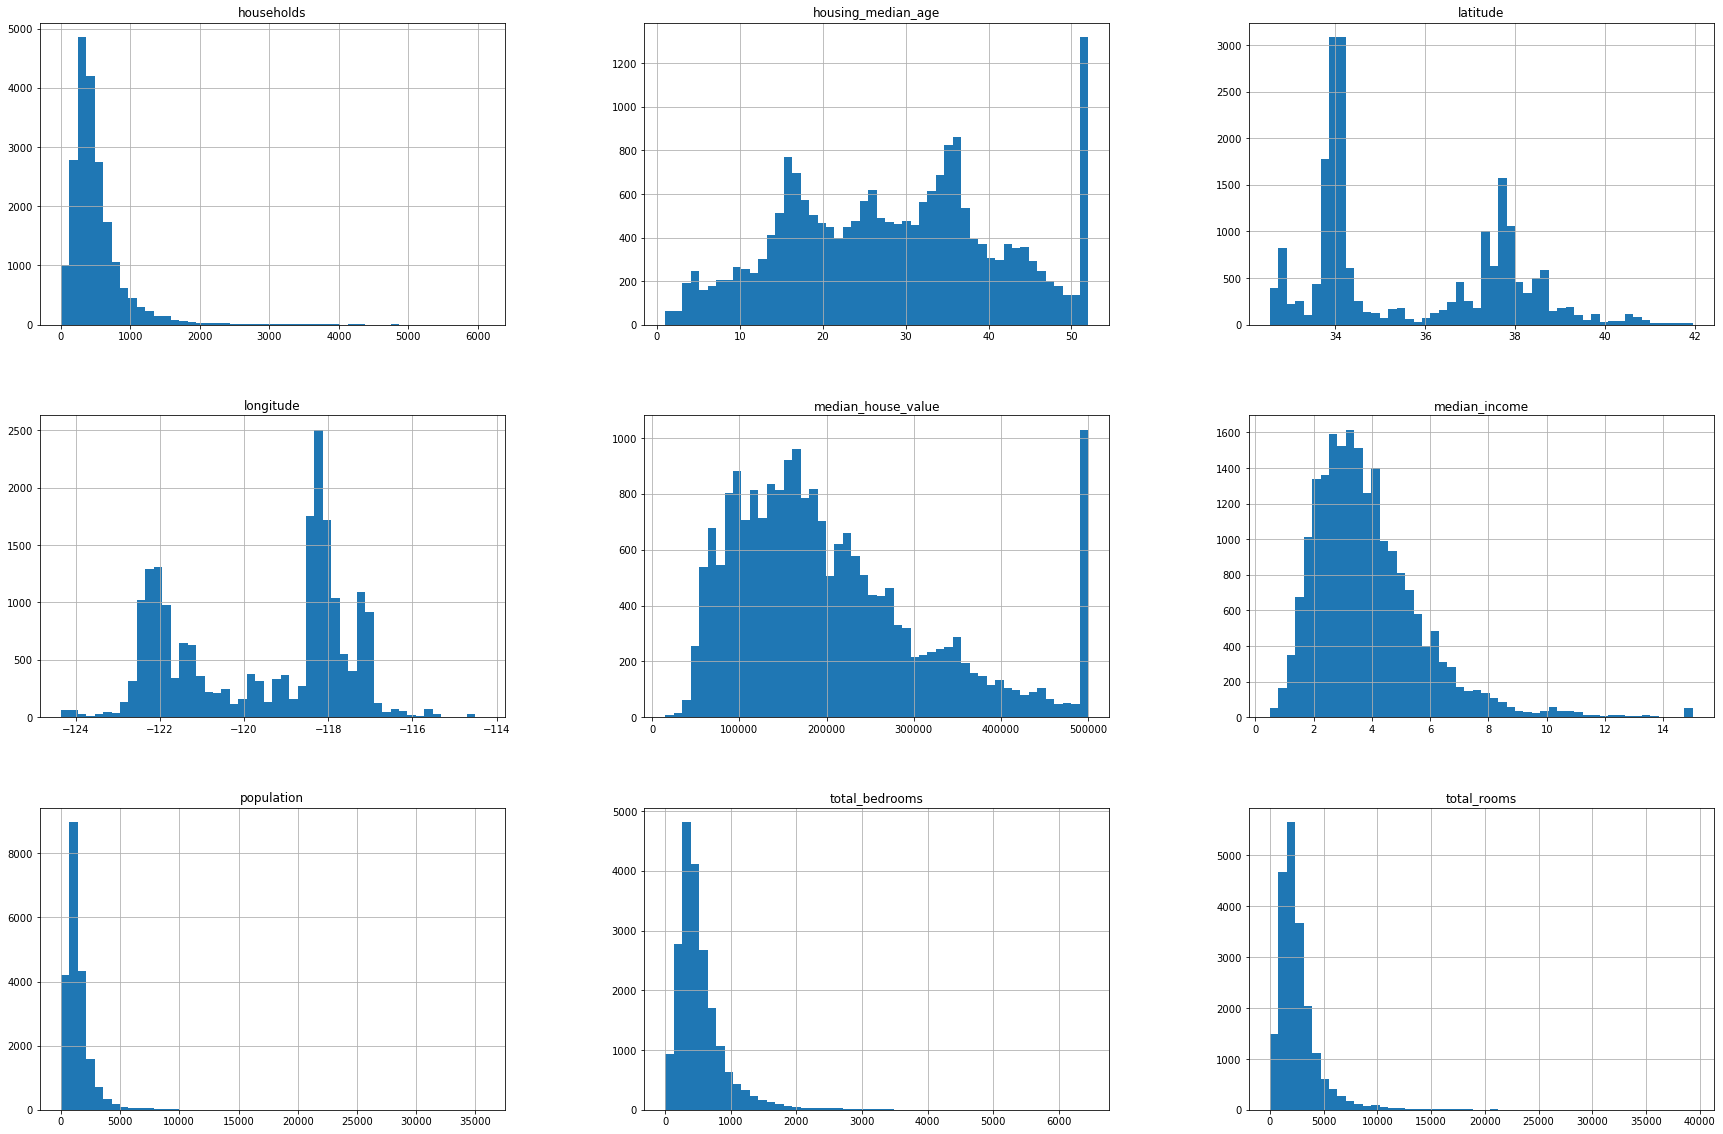

In [14]:
df.hist(bins=50, figsize=(30, 20))

## Cleaning

remove rows with null value in total bedroom
since only total bedroom series which has null values, lets clean it

In [15]:
df.dropna(subset=["total_bedrooms"], inplace=True)

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20433 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20433 non-null  float64
 1   latitude            20433 non-null  float64
 2   housing_median_age  20433 non-null  float64
 3   total_rooms         20433 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20433 non-null  float64
 6   households          20433 non-null  float64
 7   median_income       20433 non-null  float64
 8   median_house_value  20433 non-null  float64
 9   ocean_proximity     20433 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.7+ MB


In [17]:
# Split test set

In [18]:
import numpy as np

In [19]:
shuffeled_indices = np.random.permutation(10)
print(shuffeled_indices)

[7 9 4 5 2 3 8 1 0 6]


### Split Train & Test sets
Using normal splitting or Sklearn splitting

In [20]:
def split_train_test_sets(dataset: pd.DataFrame, ratio):
    # set the seed of the number generator to generate the same random numbers each time
    np.random.seed(42)
    shuffeled_indices = np.random.permutation(len(dataset))
    test_size = int(ratio * len(dataset))
    test_indices = shuffeled_indices[:test_size]
    train_indices = shuffeled_indices[test_size:]
    # iloc is integer position based indexing, while "loc" is label based(label can be integer also)
    return dataset.iloc[train_indices], dataset.iloc[test_indices]
    

In [21]:
train_set, test_set = split_train_test_sets(df, 0.2)

In [22]:
print(len(test_set), len(train_set))

4086 16347


In [23]:
from sklearn.model_selection import train_test_split

In [24]:
train_set, test_set = train_test_split(df, test_size=0.2, shuffle=True, random_state=42)

In [25]:
print(len(test_set), len(train_set))


4087 16346


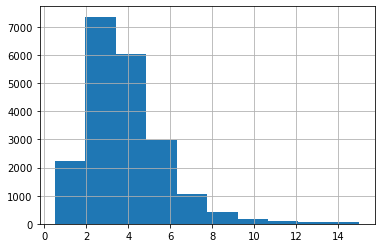

In [26]:
df["median_income"].hist()

In [27]:
# create income categories (category range for different median income value) 
# to make sure that splitting the dataset will have all categories by StartisfiedShuffleSplit Sikitlearn

housing_income_category = pd.cut(df["median_income"], 
                                 bins=[0.0, 1.5, 3.0, 4.5, 6.0, np.inf],
                                 labels=[1, 2, 3, 4, 5])

In [28]:
df["income_category"] = housing_income_category

In [29]:
df["income_category"].value_counts()

3    7156
2    6515
4    3611
5    2337
1     814
Name: income_category, dtype: int64

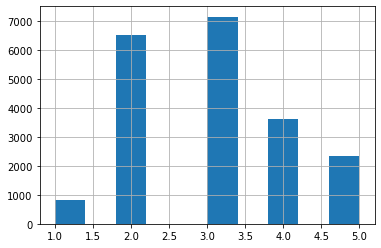

In [30]:
df["income_category"].hist()

In [31]:
from sklearn.model_selection import StratifiedShuffleSplit

In [32]:
splitter = StratifiedShuffleSplit(n_splits=1, random_state=42, test_size=0.2)

In [33]:
# split result is just a train indices array & test indices array, but it must be accessed like that
# this is a loop of 1 iteration because n_splits = 1
# Dataframe
train_set, test_set = None, None
for train_indices, test_indices in splitter.split(df, df["income_category"]):
    train_set = df.iloc[train_indices]
    test_set = df.iloc[test_indices]


In [34]:
print(df.size, train_set.size, test_set.size)

224763 179806 44957


Note that the train & test sets have similar value counts of the categories
Because they are splitted using the StratifiedShuffle

In [35]:
train_set["income_category"].value_counts() / len(train_set)

3    0.350239
2    0.318855
4    0.176740
5    0.114340
1    0.039826
Name: income_category, dtype: float64

In [36]:
test_set["income_category"].value_counts() / len(test_set)

3    0.350135
2    0.318816
4    0.176658
5    0.114509
1    0.039883
Name: income_category, dtype: float64

In [37]:
df["income_category"].value_counts() / len(df)

3    0.350218
2    0.318847
4    0.176724
5    0.114374
1    0.039838
Name: income_category, dtype: float64

In [38]:
# After splitting the dataset based on income category
# Remove it, not to use it in the dataset again
df.drop("income_category", axis=1, inplace=True)

# Visualization

Since there is geographical information (latitude and longitude), it is a good idea to
create a scatterplot of all districts to visualize the data

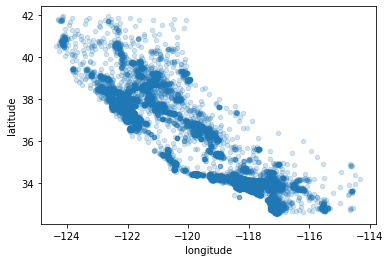

In [39]:
df.plot(kind="scatter", x="longitude", y="latitude", alpha=0.2)

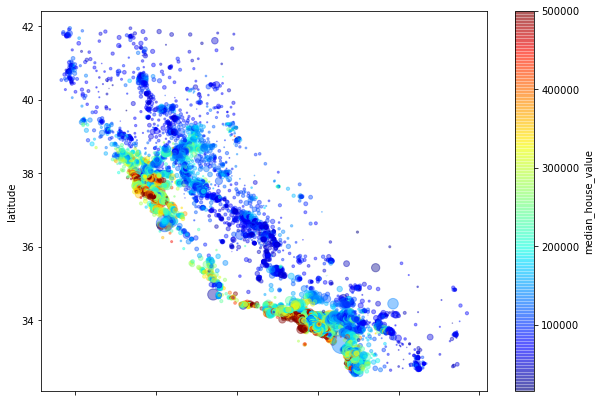

In [40]:
df.plot(kind="scatter", x="longitude", y="latitude", alpha=0.4, figsize=(10,7), 
        c="median_house_value", cmap=plt.get_cmap("jet"), colorbar=True,
        s=df["population"]/100)


# Visualize Coorelations
We are interested in correlation between the target value (predicted) against all input values
but not between the input values(features) themselves

In [41]:
housing = df
corr_matrix = housing.corr()

In [42]:
type(corr_matrix)

pandas.core.frame.DataFrame

In [43]:
# 1 / -1 = total coorelation
# small values = no coorelation (not important features)
# big values (>0.4) = strong features (like median_income)
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.688355
total_rooms           0.133294
housing_median_age    0.106432
households            0.064894
total_bedrooms        0.049686
population           -0.025300
longitude            -0.045398
latitude             -0.144638
Name: median_house_value, dtype: float64

In [44]:
# scatter matrix is a plotting of many serieses
from pandas.plotting import scatter_matrix

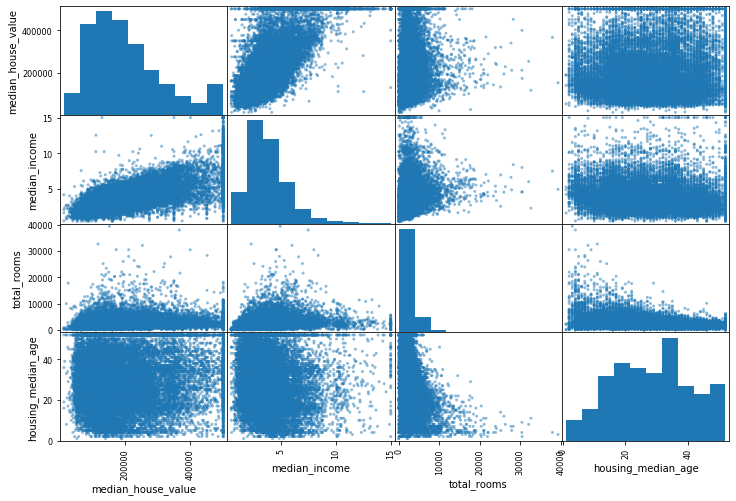

In [45]:
attributes = ["median_house_value", "median_income", "total_rooms","housing_median_age"]
scatter_mat = scatter_matrix(housing[attributes] ,figsize=(12,8))

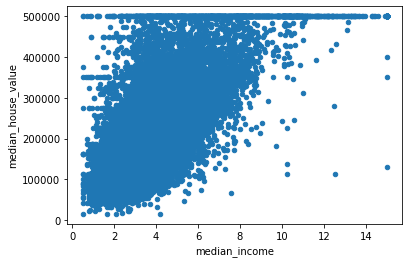

In [46]:
# this is instead of making Dataframe.plot() for each 2 attributes

housing.plot(kind="scatter", x="median_income", y="median_house_value")

In [47]:
# try different combinations
housing["rooms_per_household"] = housing["total_rooms"]/housing["households"]
housing["bedrooms_per_room"] = housing["total_bedrooms"]/housing["total_rooms"]
housing["population_per_household"]=housing["population"]/housing["households"]

In [48]:
corr_matrix = housing.corr()

In [49]:
# Some combinations makes better correlation with the target 
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value          1.000000
median_income               0.688355
rooms_per_household         0.151344
total_rooms                 0.133294
housing_median_age          0.106432
households                  0.064894
total_bedrooms              0.049686
population_per_household   -0.023639
population                 -0.025300
longitude                  -0.045398
latitude                   -0.144638
bedrooms_per_room          -0.255880
Name: median_house_value, dtype: float64

In [50]:
# Clean the weak features
housing.drop("total_bedrooms", axis=1, inplace=True)
housing.drop("total_rooms", axis=1, inplace=True)
housing.drop("population_per_household", axis=1, inplace=True)
housing.drop("households", axis=1, inplace=True)

# Data Preprocessing (Transformations)
transform the training set only, and separate the features from labels so transformations is done on the features only

In [51]:
train_set, test_set = train_test_split(housing, test_size=0.2, shuffle=True, random_state=42)
len(train_set)

16346

In [52]:
train_set.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16346 entries, 17727 to 15948
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   longitude            16346 non-null  float64
 1   latitude             16346 non-null  float64
 2   housing_median_age   16346 non-null  float64
 3   population           16346 non-null  float64
 4   median_income        16346 non-null  float64
 5   median_house_value   16346 non-null  float64
 6   ocean_proximity      16346 non-null  object 
 7   rooms_per_household  16346 non-null  float64
 8   bedrooms_per_room    16346 non-null  float64
dtypes: float64(8), object(1)
memory usage: 1.2+ MB


In [53]:
# Split the features and labels
train_set_features = train_set.drop("median_house_value", axis=1, inplace=False)
train_set_labels = train_set["median_house_value"].copy()

## Numerical Attributes

### Cleaning numerical by removing or subestituting 

In [54]:
# Transformation of cleaning all the missing values with median
from sklearn.impute import SimpleImputer
median_imputer = SimpleImputer(strategy="median")

In [55]:
# We apply the median imputer on only numerical serieses
num_features = train_set_features.drop(["ocean_proximity"], axis=1)
categorial_features = train_set_features[["ocean_proximity"]] # list is because we can have many categorials serieses

In [56]:
# fit is only called on the training set
median_imputer.fit(num_features)
num_features_numpy = median_imputer.transform(num_features)

In [57]:
num_features = pd.DataFrame(num_features_numpy, columns=num_features.columns)

In [58]:
num_features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16346 entries, 0 to 16345
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   longitude            16346 non-null  float64
 1   latitude             16346 non-null  float64
 2   housing_median_age   16346 non-null  float64
 3   population           16346 non-null  float64
 4   median_income        16346 non-null  float64
 5   rooms_per_household  16346 non-null  float64
 6   bedrooms_per_room    16346 non-null  float64
dtypes: float64(7)
memory usage: 894.0 KB


## Categorial Attributes
categories are handled via sklean encoders transformers

In [59]:
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder

In [60]:
categorial_features["ocean_proximity"].value_counts()

<1H OCEAN     7231
INLAND        5156
NEAR OCEAN    2114
NEAR BAY      1842
ISLAND           3
Name: ocean_proximity, dtype: int64

In [61]:
ordianl_encoder = OrdinalEncoder()
ordinal_categorial_features = ordianl_encoder.fit_transform(categorial_features) 

In [62]:
# returns numpy so convert it to Pandas.DataFrame
ordinal_categorial_features = pd.DataFrame(ordinal_categorial_features, columns=categorial_features.columns)

In [63]:
ordinal_categorial_features["ocean_proximity"].value_counts()

0.0    7231
1.0    5156
4.0    2114
3.0    1842
2.0       3
Name: ocean_proximity, dtype: int64

In [64]:
ordianl_encoder.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

ML algorithms will assume that two nearby
values are more similar than two distant values. This may be fine in some cases (e.g.,
for ordered categories such as “bad”, “average”, “good”, “excellent”), but it is obviously
not the case for the ocean_proximity column (for example, categories 0 and 4 are
clearly more similar than categories 0 and 1). To fix this issue, a common solution is
to create one binary attribute per category: one attribute equal to 1 when the category
is “<1H OCEAN” (and 0 otherwise), another attribute equal to 1 when the category is
“INLAND” (and 0 otherwise),

In [65]:
oneHot_encoder = OneHotEncoder()
onehot_cat_features = oneHot_encoder.fit_transform(categorial_features)

In [66]:
# returns sparse matrix so convert it to numpy 
onehot_cat_features.toarray()

array([[1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       ...,
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 1., 0.]])

In [67]:
oneHot_encoder.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

# Feature Scaling 
### For Numerical Attributes (Normalization & Standerdization) Transforms 

### Normalization: 
Values are shifted and rescaled so that they end up ranging from 0 to 1. We do this by subtracting the min value and dividing by the max minus the min

In [68]:
# Normalization 
from sklearn.preprocessing import MinMaxScaler
normalization = MinMaxScaler()

In [69]:
num_features_normalized = normalization.fit_transform(num_features)

In [70]:
num_features.head(5)

longitude  latitude  housing_median_age  population  median_income  \
0    -121.80     37.32                14.0      2698.0         4.7027   
1    -119.63     36.64                33.0       620.0         3.4107   
2    -118.06     34.12                25.0      1848.0         3.6639   
3    -118.31     34.07                28.0      2759.0         2.2364   
4    -117.27     33.04                27.0      1302.0         3.5500   

   rooms_per_household  bedrooms_per_room  
0             4.951740           0.209429  
1             5.954023           0.174710  
2             5.126482           0.217939  
3             2.642058           0.401778  
4             4.551980           0.213159

In [71]:
num_features_normalized = pd.DataFrame(num_features_normalized, columns=num_features.columns)
num_features_normalized.head(5)

longitude  latitude  housing_median_age  population  median_income  \
0   0.258097  0.507970            0.254902    0.075535       0.289844   
1   0.477733  0.435707            0.627451    0.017293       0.200742   
2   0.636640  0.167906            0.470588    0.051711       0.218204   
3   0.611336  0.162593            0.529412    0.077244       0.119757   
4   0.716599  0.053135            0.509804    0.036408       0.210349   

   rooms_per_household  bedrooms_per_room  
0             0.029105           0.121588  
1             0.036210           0.083012  
2             0.030343           0.131043  
3             0.012731           0.335309  
4             0.026271           0.125733

### Standerdization
Subtracts the mean value (so standardized values always have a zero mean), and then it divides by the standard deviation so that the resulting distribution has unit variance 
and It is not bound to a speceifc range

In [72]:
# Standerdization
from sklearn.preprocessing import StandardScaler
standerdization = StandardScaler()

In [73]:
num_features_std = standerdization.fit_transform(num_features)

In [74]:
num_features_std = pd.DataFrame(num_features_std, columns=num_features.columns)

In [75]:
num_features_std.head(5)

longitude  latitude  housing_median_age  population  median_income  \
0  -1.106514  0.786208           -1.162062    1.131110       0.438412   
1  -0.024671  0.467873            0.348657   -0.708899      -0.242389   
2   0.758045 -0.711838           -0.287435    0.378459      -0.108969   
3   0.633408 -0.735245           -0.048901    1.185124      -0.861168   
4   1.151895 -1.217429           -0.128412   -0.105008      -0.168986   

   rooms_per_household  bedrooms_per_room  
0            -0.200545          -0.064010  
1             0.224187          -0.664804  
2            -0.126495           0.083253  
3            -1.179305           3.264551  
4            -0.369948           0.000545

# Pipeline Transform
We **Must** have pipeline for the preprocessing so that we can use it on the tested data without doing all the preprocessing steps again

In [76]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

num_pipeline = Pipeline([
    ("median_imputer", median_imputer),
    ("std_feature_scaling", standerdization)
])

categorial_pipeline = Pipeline([
#     ("onehot", oneHot_encoder)
    ("ordinal", ordianl_encoder)
])

# Combine the pipelines on a specefic columns to apply on, in the Dataframe
num_attributes = num_features.columns.to_list() # ["median_income", "population" .. etc]
categorial_attributes = ["ocean_proximity"]

preprocessing_pipeline = ColumnTransformer([
    ("num_name", num_pipeline, num_attributes),
    ("cat_name", categorial_pipeline, categorial_attributes)
])

In [77]:
# Fit transform on Training dataset (Only) .. but on test data just call transform()
prepared_train_set = preprocessing_pipeline.fit_transform(train_set_features)

In [78]:
train_set_features.columns.to_list()

['longitude',
 'latitude',
 'housing_median_age',
 'population',
 'median_income',
 'ocean_proximity',
 'rooms_per_household',
 'bedrooms_per_room']

In [79]:
prepared_train_set = pd.DataFrame(prepared_train_set, columns=train_set_features.columns)

In [80]:
prepared_train_set.columns.to_list()

['longitude',
 'latitude',
 'housing_median_age',
 'population',
 'median_income',
 'ocean_proximity',
 'rooms_per_household',
 'bedrooms_per_room']

# Linear Regression 

In [81]:
# 5 Samples
sample_data   = train_set_features.iloc[:5]
sample_labels = train_set_labels.iloc[:5]

In [82]:
from sklearn.linear_model import LinearRegression

In [83]:
linear_regressor = LinearRegression()
linear_regressor.fit(X=prepared_train_set, y=train_set_labels)

LinearRegression()

In [84]:
prepared_sample_data = preprocessing_pipeline.transform(sample_data)
predictions = linear_regressor.predict(prepared_sample_data)

In [85]:
predictions = pd.DataFrame(predictions)
predictions

0
0  248196.153699
1  139910.290122
2  192340.321917
3  204160.759552
4  199885.500708

In [86]:
sample_labels

17727    227600.0
2057     110400.0
6453     248100.0
4619     305600.0
15266    214600.0
Name: median_house_value, dtype: float64

# Evaluating and Error (MSE)

In [87]:
from sklearn.metrics import mean_squared_error

In [88]:
# Predict on all train set
predictions_train_set = linear_regressor.predict(prepared_train_set)

In [89]:
mse = mean_squared_error(predictions_train_set, train_set_labels)

In [90]:
rmse = np.sqrt(mse)

In [91]:
rmse

71333.20482934885

# Validation dataset & Cross Validation
We need to split the train set into train & validation dataset, so that we can compute the error acrros the validation dataset (we don't want to evaluate on the test dataset not to overfit it)

Cross validation split the train set into 0.1 part validation set and 0.9 part train set, but 10 times, each time with different validation set

In [92]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(linear_regressor, X=prepared_train_set, y=train_set_labels,
                        scoring="neg_mean_squared_error", cv=10) # cv is the number of parts to give just 1 for validation

In [93]:
# score is the opposite of error
error = np.sqrt(-scores)

In [94]:
print(error, " mean=", error.mean(), " .. std=",error.std())

[68825.0423939  67348.43449173 71416.21032261 72879.04549488
 71756.68530201 69658.04970293 73145.57903429 73782.1674147
 72135.54087014 72587.23526683]  mean= 71353.39902940221  .. std= 1975.9970277324956


# Desicion Tree

In [95]:
from sklearn.tree import DecisionTreeRegressor
decision_tree = DecisionTreeRegressor()
decision_tree.fit(X=prepared_train_set, y=train_set_labels)

DecisionTreeRegressor()

In [96]:
predictions = decision_tree.predict(prepared_sample_data)

In [97]:
predictions

array([227600., 110400., 248100., 305600., 214600.])

In [98]:
sample_labels.to_list() # No error !!!!!!!! overfitting

[227600.0, 110400.0, 248100.0, 305600.0, 214600.0]

In [99]:
total_predictions = decision_tree.predict(prepared_train_set)
mse = mean_squared_error(total_predictions, train_set_labels)

In [100]:
mse # 0 error !!! overfitting

0.0

In [101]:
# Try cross validation to check validation data (which is not trained)
scores = cross_val_score(decision_tree, X=prepared_train_set, y=train_set_labels,
                        scoring="neg_mean_squared_error", cv=10)
error = np.sqrt(-scores)

In [102]:
print(error, " mean=", error.mean(), " .. std=",error.std()) # big error, worse than linear regression

[68645.84688351 62268.85052125 69285.16427983 71002.35883345
 67816.64657154 70068.77119435 71558.23622511 70011.5070236
 69566.57484767 68479.46090624]  mean= 68870.34172865415  .. std= 2450.6882477623135


# Fine-tuning GridSeach & RandomizedSearch

In [103]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

In [108]:
# different parameters combinations to try
params = {
    'max_depth': [2, 3, 5, 10, 20],
    'min_samples_leaf': [5, 10, 20, 50, 100]
}

In [109]:
# cv because it train using cross validation, this is the num of folds(parts)
# params, is the parameters to try
grid_search = GridSearchCV(estimator=decision_tree, 
                           param_grid=params,
                           scoring="neg_mean_squared_error",
                           cv=5,
                           return_train_score=True)

In [110]:
grid_search.fit(prepared_train_set, train_set_labels)

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(),
             param_grid={'max_depth': [2, 3, 5, 10, 20],
                         'min_samples_leaf': [5, 10, 20, 50, 100]},
             return_train_score=True, scoring='neg_mean_squared_error')

In [111]:
grid_search.best_params_

{'max_depth': 20, 'min_samples_leaf': 20}

In [113]:
results = pd.DataFrame(grid_search.cv_results_)

In [116]:
results[["mean_test_score", "params"]]

mean_test_score                                      params
0     -7.363011e+09     {'max_depth': 2, 'min_samples_leaf': 5}
1     -7.363011e+09    {'max_depth': 2, 'min_samples_leaf': 10}
2     -7.363011e+09    {'max_depth': 2, 'min_samples_leaf': 20}
3     -7.363011e+09    {'max_depth': 2, 'min_samples_leaf': 50}
4     -7.363011e+09   {'max_depth': 2, 'min_samples_leaf': 100}
5     -6.629737e+09     {'max_depth': 3, 'min_samples_leaf': 5}
6     -6.629737e+09    {'max_depth': 3, 'min_samples_leaf': 10}
7     -6.629737e+09    {'max_depth': 3, 'min_samples_leaf': 20}
8     -6.629737e+09    {'max_depth': 3, 'min_samples_leaf': 50}
9     -6.629737e+09   {'max_depth': 3, 'min_samples_leaf': 100}
10    -4.955668e+09     {'max_depth': 5, 'min_samples_leaf': 5}
11    -4.939413e+09    {'max_depth': 5, 'min_samples_leaf': 10}
12    -4.931871e+09    {'max_depth': 5, 'min_samples_leaf': 20}
13    -4.937954e+09    {'max_depth': 5, 'min_samples_leaf': 50}
14    -4.948717e+09   {'max_depth': 5, 'min_samples_leaf': 100}
15    -3.566649e+09    {'max_depth': 10, 'min_samples_leaf': 5}
16    -3.517037e+09   {'max_depth': 10, 'min_samples_leaf': 10}
17    -3.519196e+09   {'max_depth': 10, 'min_samples_leaf': 20}
18    -3.709031e+09   {'max_depth': 10, 'min_samples_leaf': 50}
19    -4.136083e+09  {'max_depth': 10, 'min_samples_leaf': 100}
20    -3.728774e+09    {'max_depth': 20, 'min_samples_leaf': 5}
21    -3.510935e+09   {'max_depth': 20, 'min_samples_leaf': 10}
22    -3.465331e+09   {'max_depth': 20, 'min_samples_leaf': 20}
23    -3.687439e+09   {'max_depth': 20, 'min_samples_leaf': 50}
24    -4.135641e+09  {'max_depth': 20, 'min_samples_leaf': 100}

In [122]:
# Update the desicion tree with the best hyperparameters
decision_tree = DecisionTreeRegressor(min_samples_leaf=20, max_depth=20)
decision_tree.fit(X=prepared_train_set, y=train_set_labels)

DecisionTreeRegressor(max_depth=20, min_samples_leaf=20)

# Test set evaluation

In [120]:
test_set_features = test_set.drop("median_house_value", axis=1)
test_set_labels = test_set["median_house_value"].copy()

In [121]:

test_set_prepared = preprocessing_pipeline.transform(test_set_features)

In [123]:
predictions = decision_tree.predict(test_set_prepared)

In [124]:
mse = mean_squared_error(predictions, test_set_labels)

In [128]:
np.sqrt(mse) # 58761 which is better than all prev errors !

58761.395381226066